In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
path = './data/realest.csv'
data = pd.read_csv(path)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [3]:
data

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0
155,62.0,4.0,951.0,7.0,30.0,895.0,2.0,1.0,0.0


In [4]:
data.describe()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
count,156.000000,156.000000,146.000000,156.000000,146.000000,147.000000,156.000000,156.000000,156.000000
mean,56.474359,3.166667,1097.246575,6.500000,32.808219,911.707483,1.480769,0.846154,0.230769
std,12.875307,1.348037,462.540698,1.675247,8.457859,443.263430,0.529408,0.808454,0.422682
min,32.000000,1.000000,539.000000,4.000000,24.000000,418.000000,1.000000,0.000000,0.000000
25%,46.000000,2.000000,805.250000,5.000000,25.000000,652.500000,1.000000,0.000000,0.000000
50%,55.000000,3.000000,965.500000,6.000000,30.000000,821.000000,1.500000,1.000000,0.000000
75%,65.000000,4.000000,1220.500000,7.000000,37.000000,1012.500000,2.000000,1.500000,0.000000
max,90.000000,8.000000,2295.000000,12.000000,50.000000,2752.000000,3.000000,2.000000,1.000000


In [5]:
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')


C:\Users\rastu\AppData\Local\Temp\ipykernel_1488\4220252765.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, 'values')

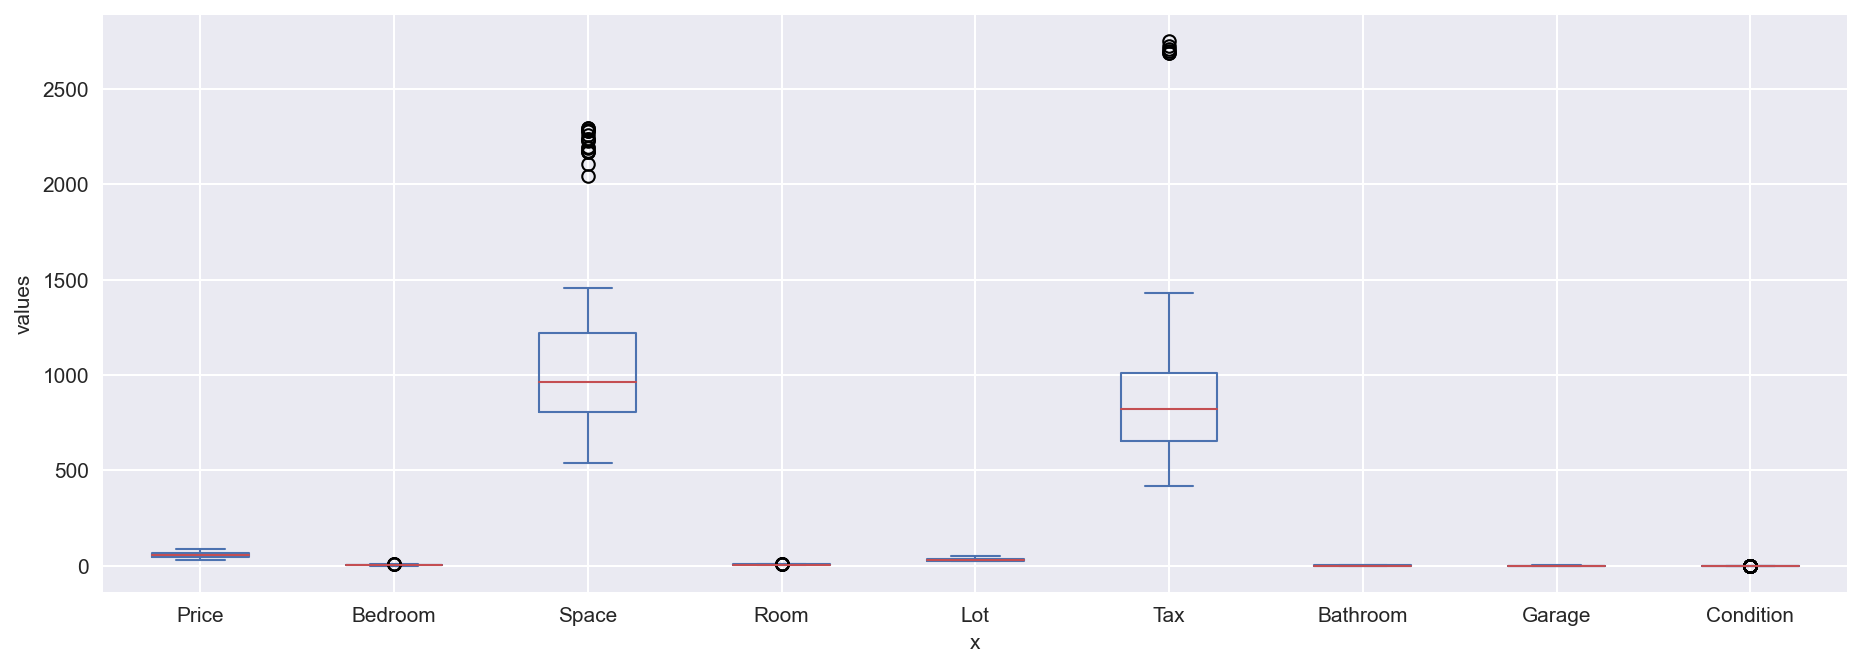

In [6]:
plt.figure(figsize=(15,5),dpi=150)
ax = plt.gca()

# Plot
_ = data.plot(kind='box', ax=ax)

ax.set_xlabel('x')
ax.set_ylabel('values')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


Text(0.5, 1.0, 'Correlation Heatmap')

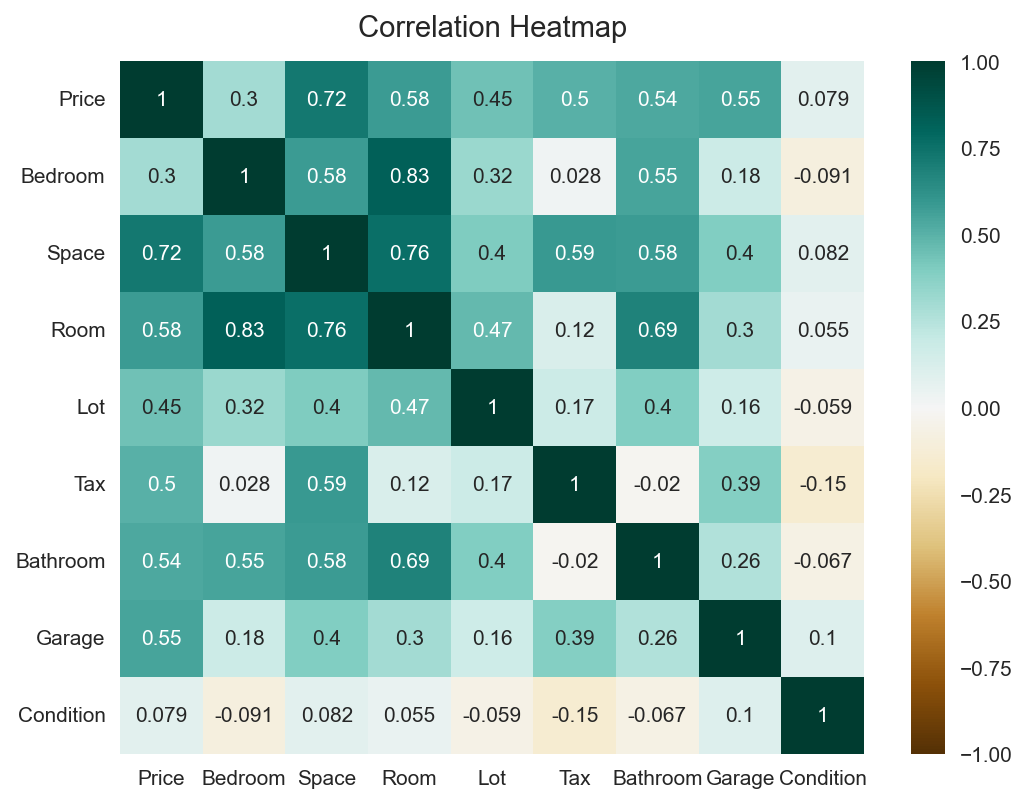

In [8]:
# Correlation Plot

plt.figure(figsize=(8, 6), dpi=150 )

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True , cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

[Text(72.72222222222221, 0.5, 'Variables')]

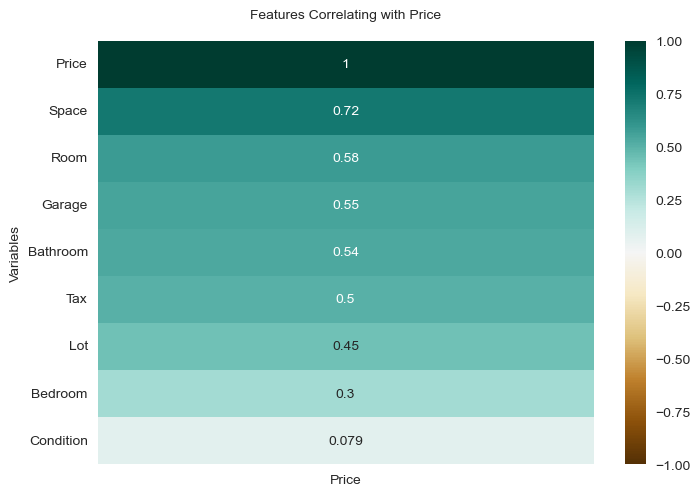

In [9]:
# heatmap separated

heatmap = sns.heatmap(data.corr()[['Price']].sort_values(by='Price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG' )
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':10}, pad=16)
heatmap.set( ylabel='Variables')

In [10]:
for i in (data.columns):
    print(i)

Price
Bedroom
Space
Room
Lot
Tax
Bathroom
Garage
Condition


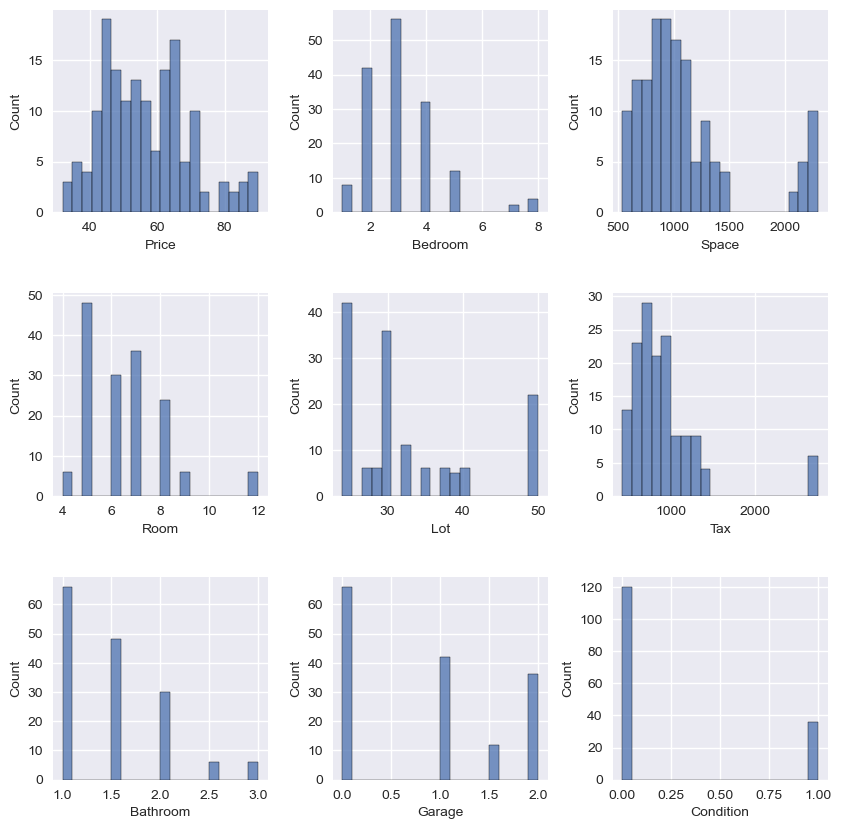

In [11]:
# Distribution Plot
fig, axes = plt.subplots(3, 3 , figsize=(10,10))

c= 0
for i,j in enumerate(data.columns):
    c += 1
    if c<=3 : sns.histplot(data=data, x=j, bins=20, ax=axes[0,i])
    elif 3<c<=6 : sns.histplot(data=data, x=j, bins=20, ax=axes[1,i-3])
    elif 6<c<=9 : sns.histplot(data=data, x=j, bins=20, ax=axes[2,i-6])
    plt.subplots_adjust( wspace=0.3, hspace=0.4 )


In [12]:
# Drop Outlier

data2 = pd.read_csv(path)

Q1 = data2.iloc[:,:].quantile(0.25)
Q3 = data2.iloc[:,:].quantile(0.75)
IQR = Q3 - Q1

col = ['Space','Tax']

for i in col :
    min_outlier = (Q1[i] - 1.5 * IQR[i])
    max_outlier = (Q3[i] + 1.5 * IQR[i])

    data2[i] = data2.loc[ (data2[i] >= min_outlier)&(data2[i] <= max_outlier) ,[i]  ]


Text(0, 0.5, 'values')

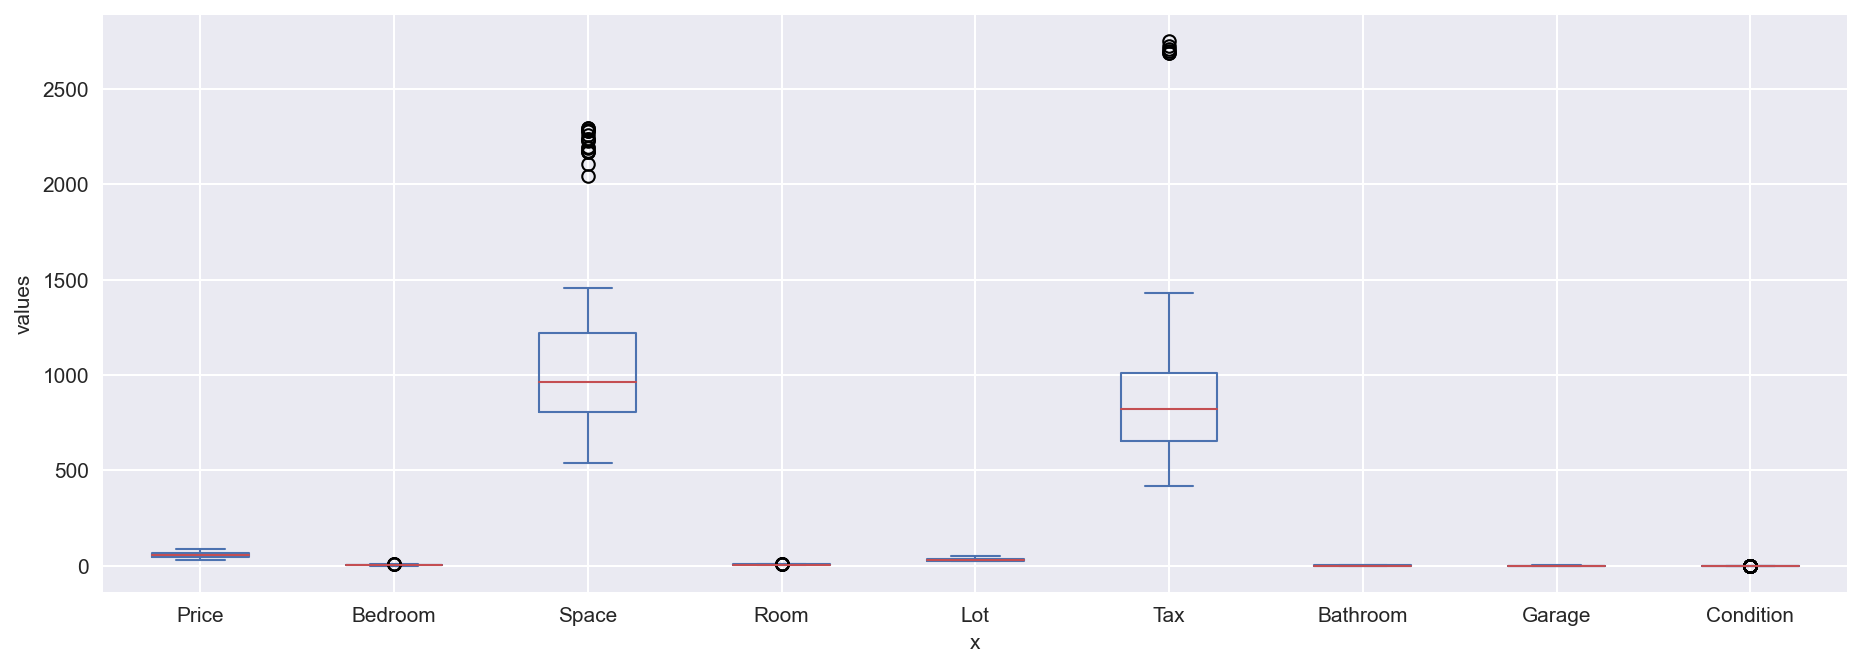

In [13]:
# Plot

plt.figure(figsize=(15,5),dpi=150)
ax = plt.gca()

_ = data.plot(kind='box', ax=ax)

ax.set_xlabel('x')
ax.set_ylabel('values')

Text(0, 0.5, 'values')

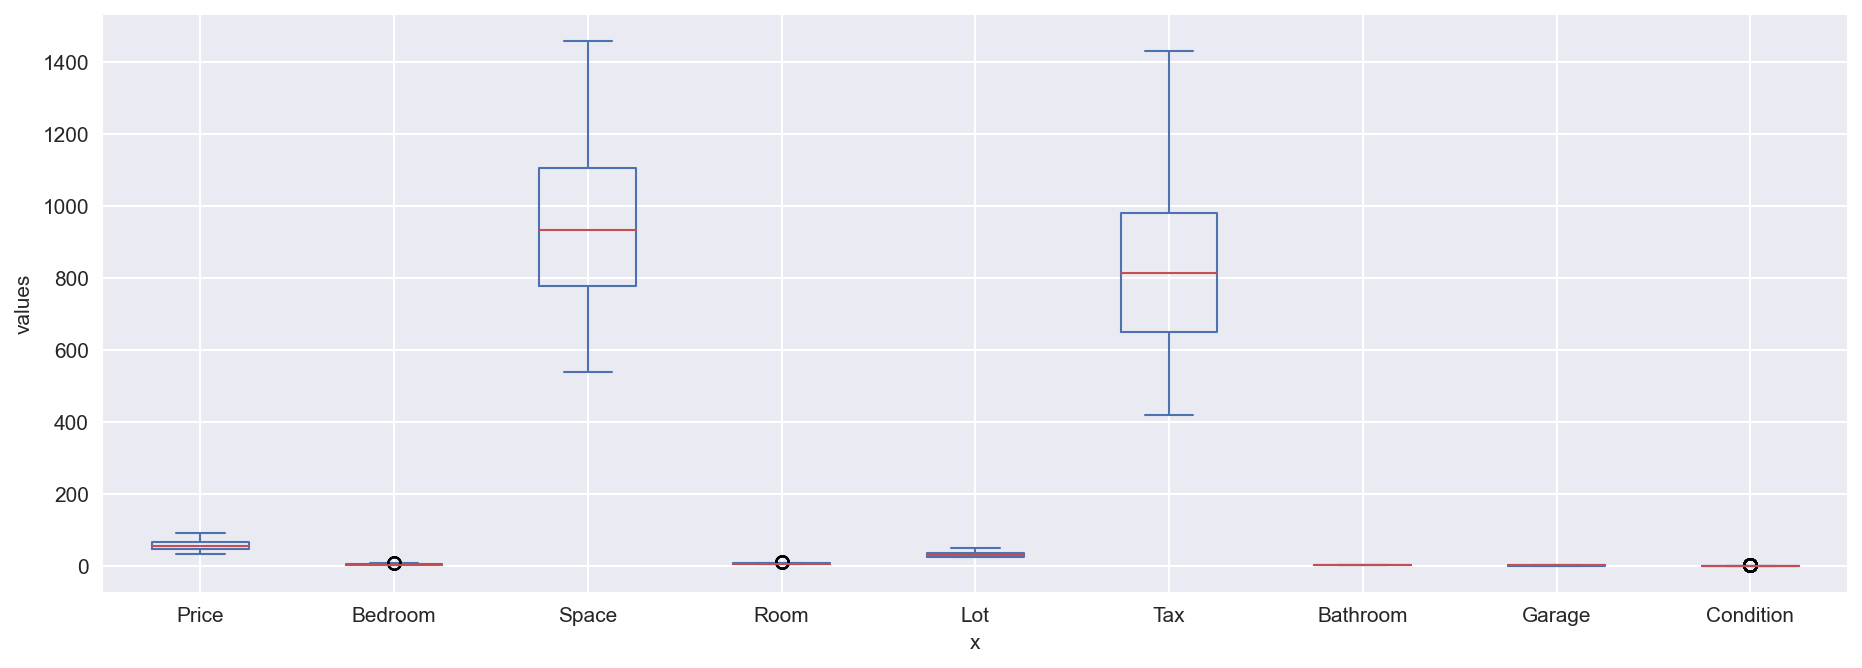

In [14]:
# Plot DATA 2

plt.figure(figsize=(15,5),dpi=150)
ax = plt.gca()

_ = data2.plot(kind='box', ax=ax)

ax.set_xlabel('x')
ax.set_ylabel('values')

In [15]:
data.dropna( inplace=True )
data2.dropna( inplace=True )

display(data.info())
display(data2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 155
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      128 non-null    float64
 1   Bedroom    128 non-null    float64
 2   Space      128 non-null    float64
 3   Room       128 non-null    float64
 4   Lot        128 non-null    float64
 5   Tax        128 non-null    float64
 6   Bathroom   128 non-null    float64
 7   Garage     128 non-null    float64
 8   Condition  128 non-null    float64
dtypes: float64(9)
memory usage: 10.0 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 155
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      111 non-null    float64
 1   Bedroom    111 non-null    float64
 2   Space      111 non-null    float64
 3   Room       111 non-null    float64
 4   Lot        111 non-null    float64
 5   Tax        111 non-null    float64
 6   Bathroom   111 non-null    float64
 7   Garage     111 non-null    float64
 8   Condition  111 non-null    float64
dtypes: float64(9)
memory usage: 8.7 KB


None

In [16]:
# feature scaling

data2.iloc[:,1:] = data2.iloc[:,1:].apply(lambda x: (x-x.min())/(x.max()-x.min()) )

data2.describe()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,53.063063,0.484234,0.436167,0.531532,0.288288,0.398726,0.373874,0.342342,0.207207
std,9.829713,0.246058,0.237998,0.284280,0.309343,0.234893,0.378204,0.387193,0.407143
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.500000,0.250000,0.261697,0.250000,0.038462,0.228036,0.000000,0.000000,0.000000
50%,54.000000,0.500000,0.422198,0.500000,0.230769,0.390918,0.500000,0.000000,0.000000
75%,61.000000,0.750000,0.592492,0.750000,0.346154,0.537019,0.500000,0.500000,0.000000
max,73.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Feature Scale & Feature selection ( correlation < 0.45 )

#data2 = data2.drop( columns=["Condition","Bedroom","Space"] )

# TRAIN

In [18]:
from sklearn.model_selection import train_test_split

x = data.drop( columns='Price' )
y = data['Price']

# Feature scale

x2 = data2.drop( columns='Price' )
y2 = data2['Price']

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.30, random_state = 42 )
X2_train, X2_test, y2_train, y2_test = train_test_split( x2, y2, test_size = 0.30, random_state = 42 )

In [19]:

lr = LinearRegression().fit(X_train,y_train)
print(f'Non Feature Scale & Feature Selection ,also Not remove any outlier : {lr.score(x,y)}')

# Feature Scale

lr2 = LinearRegression().fit(X2_train,y2_train)
print(f'Feature Scale but non-Feature Selection & remove outlier : {lr2.score(x2,y2)}')

Non Feature Scale & Feature Selection ,also Not remove any outlier : 0.7098798840646457
Feature Scale but non-Feature Selection & remove outlier : 0.54397304402341


# TEST

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=0.1, fit_intercept=True))
]

pipeline = Pipeline(steps)

In [21]:
pr = pipeline.fit(X2_train, y2_train)

print('Training score: {}'.format(pipeline.score(X2_train, y2_train)))
print('Test score: {}'.format(pipeline.score(X2_test, y2_test)))

Training score: 0.9515430678077388
Test score: 0.8656925766049423


In [22]:
y_pred = lr.predict(X_test)
y2_pred = pr.predict(X2_test)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y2_test,y2_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
print("Coefficient of determination: %.2f" % r2_score(y2_test,y2_pred))


Mean squared error: 47.76
Mean squared error: 9.97
Coefficient of determination: 0.66
Coefficient of determination: 0.87
